<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n20.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.764879,94.900396,75.134488,-5.331732e-10,220.799763,220.799763,9.398522e-08
1,0.0,1.0,83.513633,92.532839,42.529312,6.067022e-09,228.575784,228.575783,2.738168e-07
2,0.0,2.0,20.619478,81.847022,58.814826,-6.028799e-09,171.281326,171.281326,-8.099224e-08
3,0.0,3.0,33.299328,44.049991,73.954609,3.492279e-07,161.303928,161.303928,4.986589e-10
4,0.0,4.0,25.474961,91.850998,70.721281,-2.502004e-08,198.047239,198.047239,-1.011526e-08
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,21.940522,66.186837,61.568480,-9.084193e-09,159.695839,159.695840,-1.746144e-07
59996,999.0,56.0,23.933895,48.577810,49.682893,1.505438e-07,132.194597,132.194597,-1.346739e-07
59997,999.0,57.0,23.784505,45.808349,95.226679,-3.836169e-07,174.819532,174.819532,-6.695852e-07
59998,999.0,58.0,85.369249,81.186151,43.685881,3.083612e-09,220.241281,220.241281,1.024698e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.764879,94.900396,75.134488,-5.331732e-10,220.799763,220.799763,9.398522e-08
1,0.0,1.0,83.513633,92.532839,42.529312,6.067022e-09,228.575784,228.575783,2.738168e-07
2,0.0,2.0,20.619478,81.847022,58.814826,-6.028799e-09,171.281326,171.281326,-8.099224e-08
3,0.0,3.0,33.299328,44.049991,73.954609,3.492279e-07,161.303928,161.303928,4.986589e-10
4,0.0,4.0,25.474961,91.850998,70.721281,-2.502004e-08,198.047239,198.047239,-1.011526e-08
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,21.940522,66.186837,61.568480,-9.084193e-09,159.695839,159.695840,-1.746144e-07
59996,999.0,56.0,23.933895,48.577810,49.682893,1.505438e-07,132.194597,132.194597,-1.346739e-07
59997,999.0,57.0,23.784505,45.808349,95.226679,-3.836169e-07,174.819532,174.819532,-6.695852e-07
59998,999.0,58.0,85.369249,81.186151,43.685881,3.083612e-09,220.241281,220.241281,1.024698e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    40.764879  94.900396  ...  220.799763  9.398522e-08
      1.0    83.513633  92.532839  ...  228.575783  2.738168e-07
      2.0    20.619478  81.847022  ...  171.281326 -8.099224e-08
      3.0    33.299328  44.049991  ...  161.303928  4.986589e-10
      4.0    25.474961  91.850998  ...  198.047239 -1.011526e-08
...                ...        ...  ...         ...           ...
999.0 55.0   21.940522  66.186837  ...  159.695840 -1.746144e-07
      56.0   23.933895  48.577810  ...  132.194597 -1.346739e-07
      57.0   23.784505  45.808349  ...  174.819532 -6.695852e-07
      58.0   85.369249  81.186151  ...  220.241281  1.024698e-07
      59.0   47.890378  59.117241  ...  200.243784 -3.276855e-08

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    40.764879  94.900396  ...  220.799763  9.398522e-08
      1.0    83.513633  92.532839  ...  228.575783  2.738168e-07
      2.0    20.619478  81.847022  ...  171.281326 -8.099224e-08
      3.0    33.299328  44.049991  ...  161.303928  4.986589e-10
      4.0    25.474961  91.850998  ...  198.047239 -1.011526e-08
...                ...        ...  ...         ...           ...
999.0 55.0   21.940522  66.186837  ...  159.695840 -1.746144e-07
      56.0   23.933895  48.577810  ...  132.194597 -1.346739e-07
      57.0   23.784505  45.808349  ...  174.819532 -6.695852e-07
      58.0   85.369249  81.186151  ...  220.241281  1.024698e-07
      59.0   47.890378  59.117241  ...  200.243784 -3.276855e-08

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.764879,94.900396,75.134488,-5.331732e-10,220.799763,220.799763,9.398522e-08
1,0.0,1.0,83.513633,92.532839,42.529312,6.067022e-09,228.575784,228.575783,2.738168e-07
2,0.0,2.0,20.619478,81.847022,58.814826,-6.028799e-09,171.281326,171.281326,-8.099224e-08
3,0.0,3.0,33.299328,44.049991,73.954609,3.492279e-07,161.303928,161.303928,4.986589e-10
4,0.0,4.0,25.474961,91.850998,70.721281,-2.502004e-08,198.047239,198.047239,-1.011526e-08
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,21.940522,66.186837,61.568480,-9.084193e-09,159.695839,159.695840,-1.746144e-07
59996,999.0,56.0,23.933895,48.577810,49.682893,1.505438e-07,132.194597,132.194597,-1.346739e-07
59997,999.0,57.0,23.784505,45.808349,95.226679,-3.836169e-07,174.819532,174.819532,-6.695852e-07
59998,999.0,58.0,85.369249,81.186151,43.685881,3.083612e-09,220.241281,220.241281,1.024698e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    40.764879  94.900396  ...  220.799763  9.398522e-08
      1.0    83.513633  92.532839  ...  228.575783  2.738168e-07
      2.0    20.619478  81.847022  ...  171.281326 -8.099224e-08
      3.0    33.299328  44.049991  ...  161.303928  4.986589e-10
      4.0    25.474961  91.850998  ...  198.047239 -1.011526e-08
...                ...        ...  ...         ...           ...
999.0 55.0   21.940522  66.186837  ...  159.695840 -1.746144e-07
      56.0   23.933895  48.577810  ...  132.194597 -1.346739e-07
      57.0   23.784505  45.808349  ...  174.819532 -6.695852e-07
      58.0   85.369249  81.186151  ...  220.241281  1.024698e-07
      59.0   47.890378  59.117241  ...  200.243784 -3.276855e-08

[60000 rows x 7 columns]

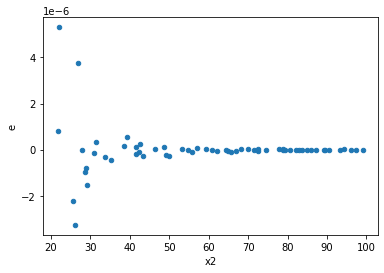

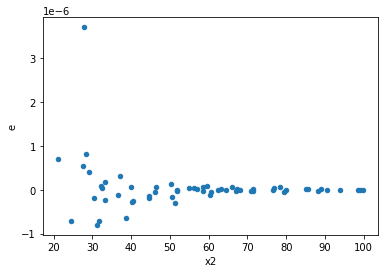

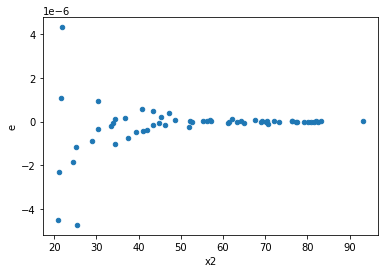

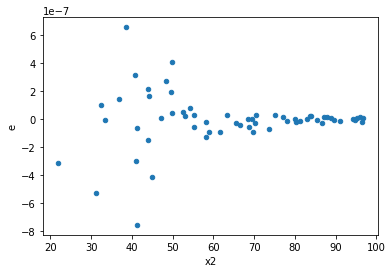

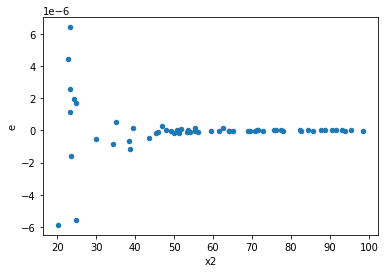

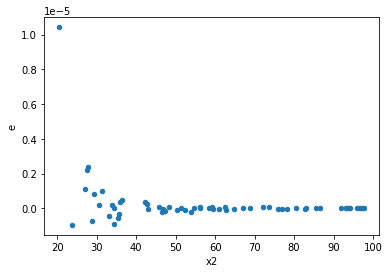

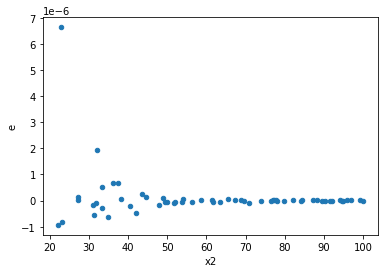

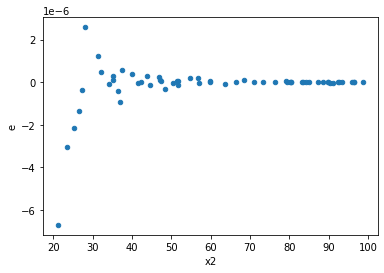

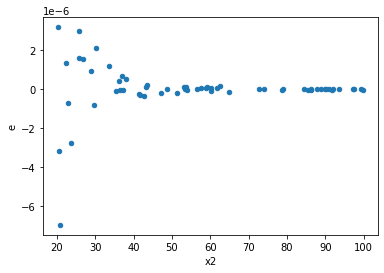

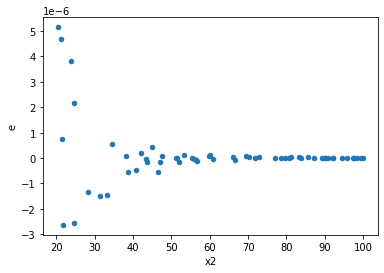

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,5.4635662295343256e-15,5.742545791357715e-11,2.731783114767163e-16,2.8712728956788576e-12,9.514188354852578e-05,2.1350261751479028e-37,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,4.58515016827781e-14,1.2776121292373731e-11,2.292575084138905e-15,6.388060646186866e-13,0.003588843643034885,7.152980368082055e-21,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,3.4088935718761165e-15,9.350570414821162e-12,1.7044467859380582e-16,4.675285207410581e-13,0.00036456530678308517,2.8372522640328173e-31,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,6.273767718434374e-15,2.553650845474695e-11,3.136883859217187e-16,1.2768254227373475e-12,0.00024567836787680155,4.5091970558949e-33,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,7.305955912249983e-15,5.5046365250694774e-11,3.6529779561249916e-16,2.7523182625347387e-12,0.00013272367537759942,7.033073680013694e-36,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,9.080634695033534e-15,3.836576710332207e-11,4.540317347516767e-16,1.9182883551661034e-12,0.00023668586296159963,3.048812956455092e-33,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,9.69856133722905e-15,6.370791024968111e-11,4.849280668614525e-16,3.1853955124840553e-12,0.00015223480568141216,2.9677073666056357e-35,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1.4111953848312137e-14,4.5558716740943807e-11,7.055976924156069e-16,2.2779358370471904e-12,0.00030975310232190243,5.133075499833712e-32,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,8.637448386612078e-15,1.6366388199613809e-10,4.318724193306039e-16,8.183194099806905e-12,5.2775531664438286e-05,4.389298564288997e-40,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64